In [45]:
import numpy as np
from scipy.optimize import minimize, differential_evolution 
import matplotlib.pyplot as plt
from math import sin, exp
%matplotlib inline

# Задача 1. Минимизация гладкой функции

In [46]:
def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [47]:
for i in range(0,10,2):
    res = minimize(f, i)
    print(res, end='\n--------\n')

      fun: 1.7452682903319903
 hess_inv: array([[6.02455355]])
      jac: array([-8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([4.13628824])
--------
      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])
--------
      fun: 1.7452682904133416
 hess_inv: array([[5.93460225]])
      jac: array([-5.1856041e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([4.13625735])
--------
      fun: 1.7452682903321235
 hess_inv: array([[6.01013314]])
      jac: array([2.23517418e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
      

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [85]:
res = minimize(f, 2, method='BFGS')
res

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])

In [87]:
first_number = round(res.fun,2)
first_number

1.75

Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [88]:
res = minimize(f, 30, method='BFGS')
res

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])

In [89]:
second_number = round(res.fun,2)
second_number

-11.9

Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

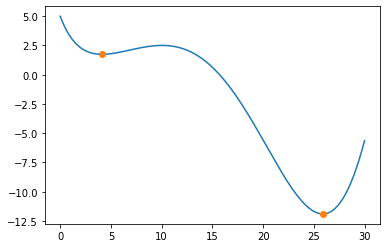

In [92]:
x = np.arange(0,30,0.01)
plt.plot(x, [f(xi) for xi in x])
plt.plot([4.13627618, 25.88019339], [f(4.13627618), f(25.88019339)], 'o')

In [91]:
with open('week3_first_task.txt', 'w') as file:
    file.write(str(first_number) + ' ' + str(second_number))

# Задача 2. Глобальная оптимизация
Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации  scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [93]:
res = differential_evolution(f, [(0,31)])
res

     fun: -11.898894665498863
     jac: array([-2.39808173e-05])
 message: 'Optimization terminated successfully.'
    nfev: 79
     nit: 4
 success: True
       x: array([25.88015276])

Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [94]:
with open('week3_second_task.txt', 'w') as file:
    file.write(str(round(res.fun, 2)))

# Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

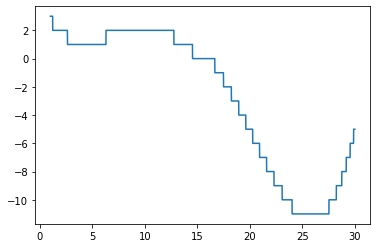

In [56]:
def h(x):
    return int(f(x))

x = np.arange(1,30, 0.001)
plt.plot(x,[h(xi) for xi in x])

In [97]:
res = minimize(h, 30, method='BFGS')
res

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [98]:
first_num = res.fun

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

In [99]:
res = differential_evolution(h, [(0,31)])
res

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([25.34770217])

In [100]:
second_num = round(res.fun, 2)

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [101]:
with open('week3_third_task.txt', 'w') as file:
    file.write('{} {}'. format(str(first_num), str(second_num)))